# RDF for different systems

In this example, we analyse different datasets and compare the RDFs in a single plot.

In [1]:
import mdsuite as mds
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
project = mds.Project(name="RDF_comparison")  # Don't want to store it on my drive

temperatures = [1050, 1400, 1650]
file_path = Path(r"<your data path here>")
experiments = {}
data_sets = {}
file_formats = {}
for temperature in temperatures:
    experiment_name = f"KCl{temperature}K"
    experiments[experiment_name] = {'time_step': 0.002, 'temperature': temperature, 'units': 'metal'}
    data_sets[experiment_name] = file_path / (experiment_name + ".extxyz")
    file_formats[experiment_name] = "extxyz"

In [3]:
project.add_experiment(experiment=experiments)

Creating a new experiment! How exciting!
** An experiment has been added titled KCl1050K **
2021-06-22 14:24:21,978 (INFO) - Created logfile 2021-06-22T14-24-21.log in experiment path C:\Users\fabia\Nextcloud\DATA\JupyterProjects\MDSuite\docs\source\_user_guide\RDF_comparison_MDSuite_Project\KCl1050K\logfiles
Creating a new experiment! How exciting!
** An experiment has been added titled KCl1400K **
2021-06-22 14:24:21,983 (INFO) - Created logfile 2021-06-22T14-24-21.log in experiment path C:\Users\fabia\Nextcloud\DATA\JupyterProjects\MDSuite\docs\source\_user_guide\RDF_comparison_MDSuite_Project\KCl1400K\logfiles
Creating a new experiment! How exciting!
** An experiment has been added titled KCl1650K **
2021-06-22 14:24:21,989 (INFO) - Created logfile 2021-06-22T14-24-21.log in experiment path C:\Users\fabia\Nextcloud\DATA\JupyterProjects\MDSuite\docs\source\_user_guide\RDF_comparison_MDSuite_Project\KCl1650K\logfiles


In [4]:
project.add_data(data_sets, file_formats)

100%|███████████████████████████████████| 3/3 [00:20<00:00,  6.96s/it]


Constructed new database


100%|███████████████████████████████████| 8/8 [00:55<00:00,  6.99s/it]


Constructed new database


100%|███████████████████████████████████| 1/1 [00:07<00:00,  7.26s/it]


Constructed new database


In [5]:
for item in project.experiments:
    project.experiments[item].run_computation.RadialDistributionFunction(
        plot=False,
        number_of_configurations=-1
    )


2021-06-22 14:26:02,348 (WARNING) - 
########################################################################################
   This is an experimental calculator. It is provided as it can still be used, however,  it may not be  memory safe or completely accurate. Please see the documentation for more information.
 #########################################################################################
2021-06-22 14:26:02,468 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 10/10 [00:08<00:00,  1.13it/s]


2021-06-22 14:26:11,833 (WARNING) - 
########################################################################################
   This is an experimental calculator. It is provided as it can still be used, however,  it may not be  memory safe or completely accurate. Please see the documentation for more information.
 #########################################################################################
2021-06-22 14:26:11,928 (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 23/23 [00:20<00:00,  1.11it/s]


2021-06-22 14:26:32,957 (WARNING) - 
########################################################################################
   This is an experimental calculator. It is provided as it can still be used, however,  it may not be  memory safe or completely accurate. Please see the documentation for more information.
 #########################################################################################
2021-06-22 14:26:33,051 (INFO) - Starting RDF Calculation


100%|███████████████████████████████████| 6/6 [00:05<00:00,  1.14it/s]


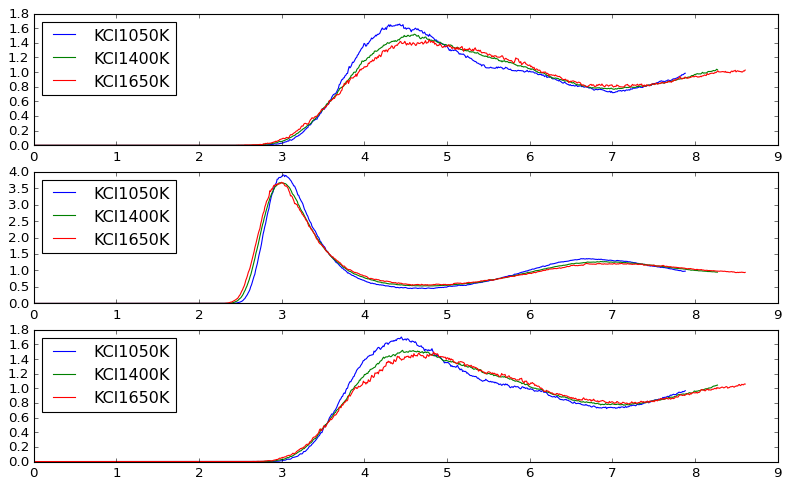

In [7]:
rdfs = project.get_properties({"analysis":"Radial_Distribution_Function"})
fig, axes = plt.subplots(3, figsize=(12, 7))
for idx, ax in enumerate(axes):
    for experiment in rdfs:
        ax.plot(rdfs[experiment][idx].data_array()[:, 0], rdfs[experiment][idx].data_array()[:, 1], label=experiment)
    ax.legend(loc="upper left")
